引入所有分析需要使用到的套件，並設定Matplotlib的樣式('ggplot')，嘗試讓系統顯示前五筆資料，確認有讀取到正確資料：

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')
colors = ['#FE5C5C','#F3A659','#67AC83','#4D83B9']

fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


設定Matplotlib顯示出來的顏色，這邊是為了方便輸出圖表時可以讓字是白色的才使用這邊的設定：

In [2]:
"""圖表文字顏色控制項"""
# COLOR = 'white'
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR

# plt.rcParams['text.color'] = COLOR

'圖表文字顏色控制項'

利用Heatmap顯示欄位的空值狀況

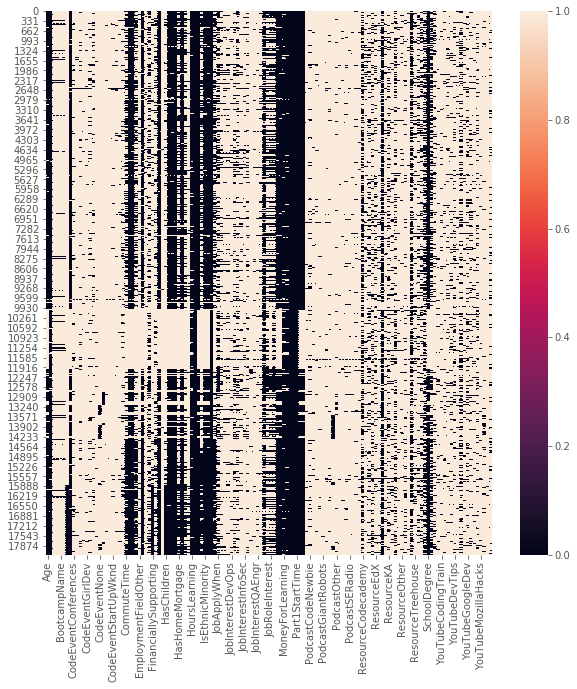

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(fcc.isnull())
plt.show()

In [4]:
fcc['JobPref'].isnull().sum()/len(fcc)

0.2581568088033012

In [5]:
# plt.figure(figsize=(30,30))
# sns.heatmap(fcc.isnull().corr())

先進行基本的使用者屬性資料分析:
年齡，收入，性別，學歷，居住地，使用語言

年齡：

In [6]:
fcc['Age'].dropna().describe()

count    15367.000000
mean        27.691872
std          8.559239
min          0.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         90.000000
Name: Age, dtype: float64

利用年齡建立distplot，因為空值會影響程式所以我們先將空值去除，並且利用平均數與標準差抓出主要的年齡分布：

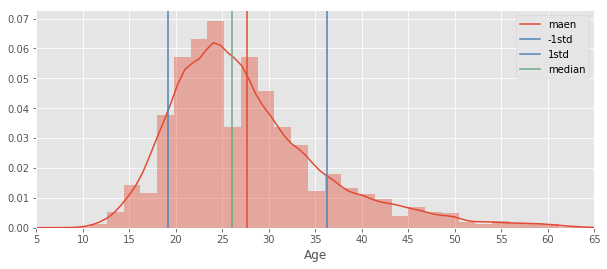

In [7]:
mean = fcc['Age'].dropna().mean()
standard = fcc['Age'].dropna().describe()['std']
plt.figure(figsize=(10,4))
sns.distplot(fcc['Age'].dropna())
plt.xticks(np.arange(0,100,5))
plt.axvline(mean,label='maen')
plt.axvline(mean-standard,label='-1std',color=colors[3])
plt.axvline(mean+standard,label='1std',color=colors[3])
plt.axvline(fcc['Age'].dropna().median(),color=colors[2],label='median')
plt.xlim(5,65)
plt.legend()
plt.show()

收入：

收入部分我們使用值方圖進行視覺化，第一次視覺化會發現圖表因為極端值變得非常長，所以我們先設定並極端值條件進行資料篩選，去除極端值後為了方便讀資料，所以我們設定X軸的座標點為10000到490000，這邊可以發現我們大多數收入部分都落在50000以內：

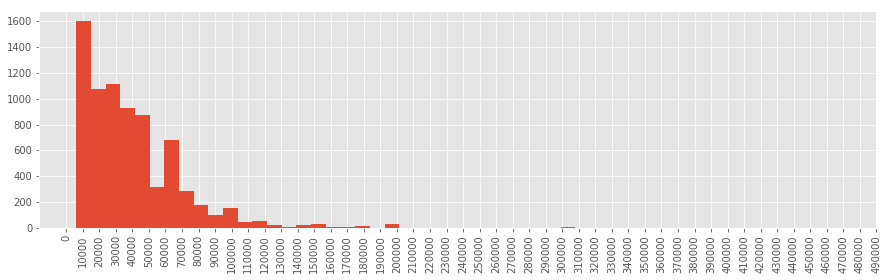

In [8]:
plt.figure(figsize=(15,4))
# sns.distplot(fcc['Income'].dropna())
fcc[fcc['Income']<500000]['Income'].dropna().hist(bins=50)
plt.xticks(np.arange(0,500000,500000/50),rotation=90)
plt.show()

In [9]:
"""自動化呈現nominal scale data的長條圖"""
def bar_plot(series,filter_value,pos_x=0,pos_y=0,percentage=False,figsize=(12,4),rotation=60):
    if percentage:
        df_bar = series.value_counts().sort_values(ascending =False)
        df_text = df_bar.copy()
        df_bar /= df_bar.sum()
        df_bar *= 100
    else:
        df_bar = series.value_counts().sort_values(ascending =False)
        df_text = df_bar
    mask = df_bar>filter_value
    df_bar[mask].plot.bar(figsize=figsize)
    for e in range(len(df_bar[mask])):
        plt.text(e-pos_x,df_bar[mask][e]+pos_y,df_text[mask][e])
    plt.ylim(0,df_bar[mask].max()*1.2)
    plt.xticks(rotation=rotation)
    plt.show()

居住地：

我們從居住地欄位中先建立次數分配表，並利用長條圖視覺化，但是因為國家數太多，所以我們加上一個篩選條件，就是指篩選使用者大於200人的國家：

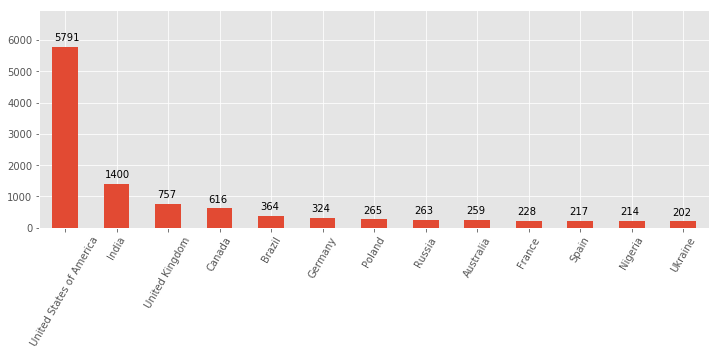

In [10]:
# country10 = fcc['CountryLive'].value_counts().sort_values(ascending =False)[0:10]
# country_rank = country10.index
# country10.plot.bar(figsize=(12,4))
# for e in range(10):
#     plt.text(e-0.16,country10[e]+200,country10[e])
# plt.xticks(rotation=60)
# plt.ylim(0,6500)
# plt.show()
bar_plot(fcc['CountryLive'],200,0.22,200)

使用語言：長條圖

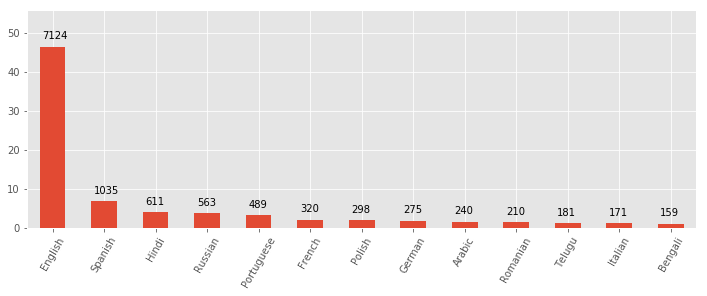

In [11]:
# lan_freq = fcc['LanguageAtHome'].value_counts()
# lan_over_100 = lan_freq[lan_freq>100].index
# lan_precentage = (lan_freq[lan_freq>100]/lan_freq[lan_freq>100].sum()*100)
# lan_precentage.plot.bar(figsize=(12,4))
# # for e in range(len(lan_freq[lan_freq>100])):
# #     plt.text(e,50,lan_precentage.values)
# plt.ylabel('Percentage')
# plt.xticks(rotation=60)
# plt.show()
# print(lan_precentage.values)

bar_plot(fcc['LanguageAtHome'],1,0.2,2,True)

學歷：長條圖

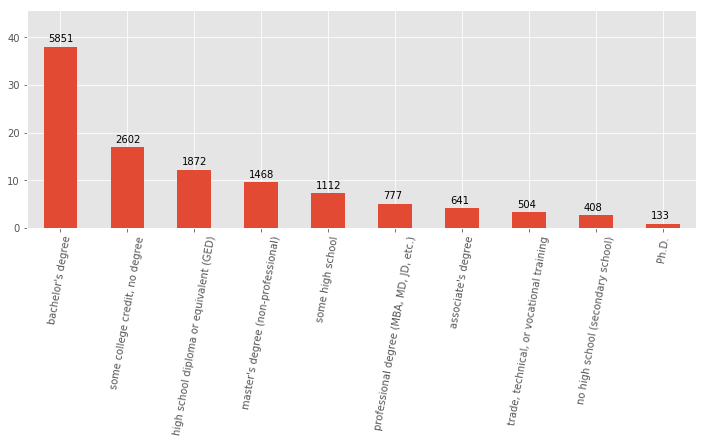

In [12]:
bar_plot(fcc['SchoolDegree'],0,0.18,1,rotation=80,percentage=True)

性別：

因為性別欄位除了【Male】【Female】之外還有其他像是第三性、跨性別者之類不同的可能值，所以我們要先將資料進行統一，讓性別只剩下男女及跨性別與空值：

In [13]:
fcc_gender = fcc.copy()
fcc_gender['Gender'] = fcc_gender['Gender'].apply(lambda x:x if x in ['male','female',np.nan] else 'transgender')
fcc_gender['Gender'].unique()

array(['female', 'male', nan, 'transgender'], dtype=object)

性別因為要比較比例，所以我們使用圓餅圖進行視覺化，調整explode參數可以讓特定的幾塊餅浮出來，autopct可以規定顯示數字的格式

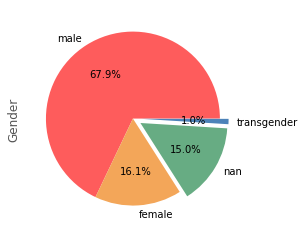

In [14]:
fcc_gender['Gender'].value_counts(dropna=False).plot.pie(explode=[0,0,0.1,0.1],colors=colors,autopct='%1.1f%%')
plt.show()

## 特徵資料分析

工作與職涯：

我們先從使用者未來的興趣工作進行分析，發現大多數使用者是趨向於網頁開發工作的，這算是一項樣本驗證，因為FCC主要開設的課程是以網頁開發為主：

In [15]:
job_match = fcc.columns.str.match('Job')
fcc.loc[:,job_match]

,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN
1,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers
2,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference
3,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home
4,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Information Security...",in an office with other developers
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freelance,NaN,NaN,NaN
6,I'm already applying,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,Full-Stack Web Developer,no preference
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freelance,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,work for a medium-sized company,1.0,"Full-Stack Web Developer, Quality Assurance ...",in an office with other developers


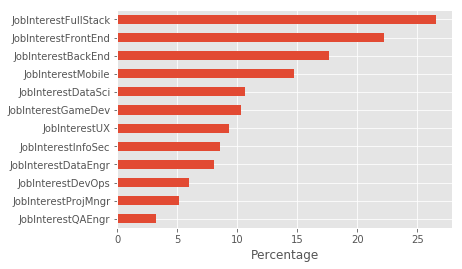

In [16]:
fcc.loc[:,fcc.columns.str.match('JobInterest')] = fcc.loc[:,fcc.columns.str.match('JobInterest')].fillna(0)
(fcc.loc[:,fcc.columns.str.match('JobInterest')].sum()/len(fcc)*100).sort_values().plot.barh()
plt.xlabel('Percentage')
plt.show()

我們分析文字欄位的'JobRoleInterest'，因為單筆資料會是一堆職位，所以要使用str.split()切分字串，並設定參數expand=True回傳一個DataFrame，讓我們可以針對這個切分後的DF進行資料操作找出所有可能的興趣職位：

In [17]:
job_list = fcc['JobRoleInterest'].str.split(pat=',',expand=True).dropna(how='all',axis=0)
all_job_unique = [job_list[e].unique() for e in range(12)]
all_job_unique

[array(['Full-Stack Web Developer', '  Front-End Web Developer',
        '  DevOps / SysAdmin', 'Back-End Web Developer',
        'Information Security', '  Data Scientist', '  Mobile Developer',
        'Data Engineer', 'Game Developer', '  Product Manager',
        '  User Experience Designer', '  Quality Assurance Engineer',
        'Ethical Hacker', 'Systems Engineer',
        'Desktop Applications Programmer', 'Non technical ',
        'Software engineer ', 'email coder',
        'Full Stack Software Engineer', 'Physicist ',
        'Security Business Analyst ', 'Research ', 'Embedded hardware',
        'Data/Interactive Journalist', 'Software Engineering',
        'Network Engineer', 'Information Developer', 'Java developer',
        'Machine learning engineer', 'Real-time systems', 'GIS Developer',
        'Research and education', 'Full Stack Developer ', 'AI',
        'Urban Planner', 'Software Engineer', 'full stack developer',
        'Computer Architect', 'Software Develope

我們要結合所有擷取出來的欄位並且從所有可能職位的名稱中找出分類的Pattern：

In [18]:
np.array(all_job_unique)
jobs = pd.Series(pd.concat(pd.Series(all_job_unique[e]) for e in range(len(all_job_unique))).unique())
jobs_web = jobs[jobs.str.contains('Web')==True]
jobs_web

0                            Full-Stack Web Developer
1                             Front-End Web Developer
3                              Back-End Web Developer
49                             Front-End Web Designer
60                                   Web development 
80                                       Web Designer
86                                      Web developer
115                            Back-End Web Developer
116                          Full-Stack Web Developer
120                           Front-End Web Developer
146     Software Developer or Front-End Web Developer
160                   Entreprenuer / Web Dev Hustler 
194                                      Web Designer
226                                        Web Design
231                         Front End Web Development
dtype: object

利用剛才找到的分類依據將資料分類為三種：['Web','No Interest','The Others']

In [19]:
fcc['InterestedOccupation'] = 'The Others'
fcc.loc[fcc['JobRoleInterest'].str.lower().str.contains('web dev',na=False),'InterestedOccupation'] = 'Web'
fcc.loc[fcc['JobRoleInterest'].isnull(),'InterestedOccupation'] = 'No Interest'

利用上面的分組將資料進行分類，並建立長條圖顯示分類佔比，可以看到網頁開發為興趣的也佔有填寫的大多數：

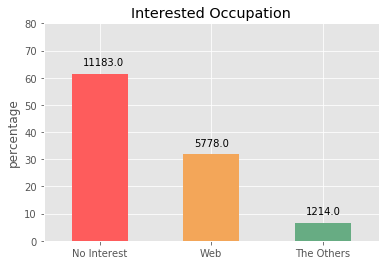

In [20]:
job_web_dev = fcc['InterestedOccupation'].value_counts(dropna=False)*100/len(fcc)
job_web_dev.plot.bar(color=colors[:len(job_web_dev)],title='Interested Occupation')
for e in range(3):
    plt.text(x=e-0.15,y=job_web_dev.iloc[e]+3,s=str(job_web_dev.iloc[e]*len(fcc)/100))
plt.ylim(0,80)
plt.ylabel('percentage')
plt.xticks(rotation=0)
plt.show()

接著以'CodeEvent'作為使用者是否會參加線下交流活動的特徵分析：

這邊要帶一個小觀念，在分析的時候欄位之間的關係細節其實非常重要，比如說我們將是否有參加過程式相關的交流活動，並將使用者分為「完全沒參加過」與「至少參加過一種」兩個標籤分類，再去進行分析，不然如果把兩者混著分析其實在比例上會有所偏誤，因為沒有參加過任何一種交流活動的人，如果要他選出有幫助的交流活動似乎有點不合理

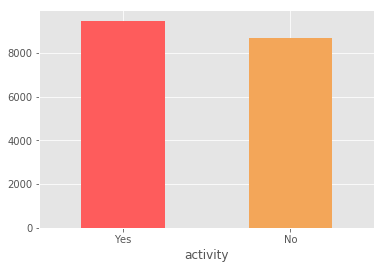

In [21]:
fcc['activity'] = fcc.loc[:,fcc.columns.str.contains('CodeEvent')].notnull().any(axis=1)
fcc['activity'].value_counts().plot.bar(color=colors)
plt.xlabel('activity')
plt.xticks((0,1),('Yes','No'),rotation=0)
plt.show()

並未處進行分類處裡的結果:

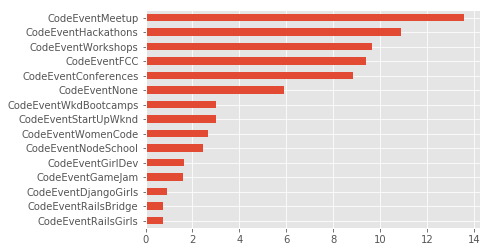

In [22]:
(fcc.loc[:,fcc.columns.str.contains('CodeEvent')].sum()/len(fcc)*100).sort_values().plot.barh()
plt.show()

經分類處理過的比例明顯提升了

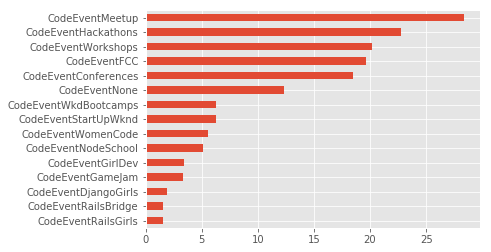

In [23]:
# len(fcc)-fcc['not_activity'].sum()
(fcc.loc[fcc['activity'],fcc.columns.str.contains('CodeEvent')].sum()*100/8701).sort_values().plot.barh()
plt.show()

In [24]:
fcc.loc[fcc['CodeEventNone'].notnull(),fcc.columns.str.contains('CodeEvent')].sum()

CodeEventConferences        2.0
CodeEventDjangoGirls        2.0
CodeEventFCC                0.0
CodeEventGameJam            0.0
CodeEventGirlDev            0.0
CodeEventHackathons         0.0
CodeEventMeetup             1.0
CodeEventNodeSchool         2.0
CodeEventNone            1076.0
CodeEventOther              0.0
CodeEventRailsBridge        0.0
CodeEventRailsGirls         0.0
CodeEventStartUpWknd        0.0
CodeEventWkdBootcamps       0.0
CodeEventWomenCode          1.0
CodeEventWorkshops          0.0
dtype: float64

以Youtube作為是否會使用線上多媒體資源的特徵依據：

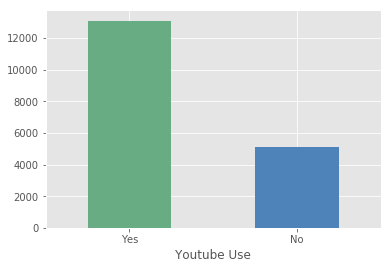

In [25]:
fcc['YoutubeUse'] = fcc.loc[:,fcc.columns.str.contains('YouTube')].notnull().any(1)
fcc['YoutubeUse'].value_counts().plot.bar(color=colors[2:4])
plt.xticks((0,1),('Yes','No'),rotation=0)
plt.xlabel('Youtube Use')
plt.show()

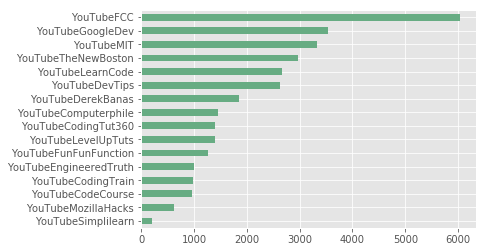

In [26]:
fcc.loc[fcc['YoutubeUse'],fcc.columns.str.contains('YouTube')].sum().sort_values().plot.barh(color=colors[2])
plt.show()

接著我們想深入了解學習動機跟嘗試線上資源兩種分類與從事程式開發時間的長短是否有某種趨勢，但這邊要注意，如果使用直方圖會受到原本分類使用者數量得多寡造成頻率上的差異使我們產生認知上的偏誤，所以這邊要使用KDEplot去分析，因為密度單位在兩邊都是與自身分類做比較

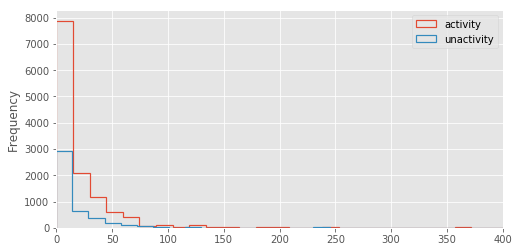

In [27]:
plt.figure(figsize=(8,4))
fcc[fcc['YoutubeUse']]['MonthsProgramming'].plot.hist(bins=50,label='activity',histtype='step',linewidth=1.2)
fcc[~fcc['YoutubeUse']]['MonthsProgramming'].plot.hist(bins=50,label='unactivity',histtype='step',linewidth=1.2)
plt.xlim(0,400)
plt.legend()
plt.show()

這邊發現開發程式時間較短的使用者對於線下活動的參加意願差異較大：

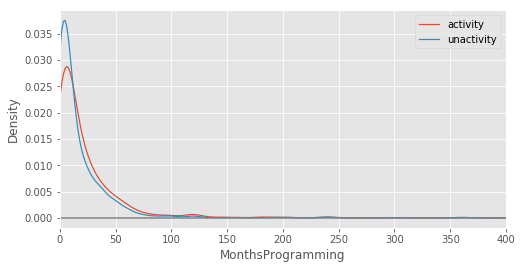

In [28]:
plt.figure(figsize=(8,4))
fcc[fcc['activity']]['MonthsProgramming'].plot.kde(label='activity',linewidth=1.2)
fcc[~fcc['activity']]['MonthsProgramming'].plot.kde(label='unactivity',linewidth=1.2)
plt.xlim(0,400)
plt.axhline(0,c='gray')
plt.xlabel('MonthsProgramming')
plt.legend()
plt.show()

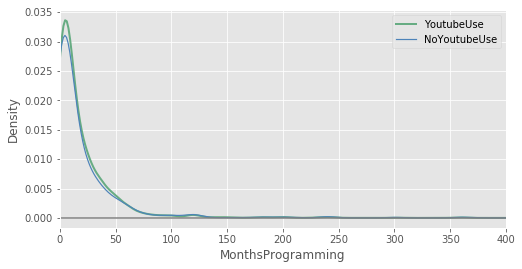

In [29]:
plt.figure(figsize=(8,4))
fcc[fcc['YoutubeUse']]['MonthsProgramming'].plot.kde(label='YoutubeUse',linewidth=2,color=colors[2])
fcc[~fcc['YoutubeUse']]['MonthsProgramming'].plot.kde(label='NoYoutubeUse',linewidth=1.2,color=colors[3])
plt.xlim(0,400)
plt.axhline(0,c='gray')
plt.xlabel('MonthsProgramming')
plt.legend()
plt.show()

In [30]:
# fcc['JobPref'].value_counts(dropna=False)

分析大學主修學科領域將這些領域進行分類：

從Major_job中選出大於100位使用者的學科領域，分析使用者數量：

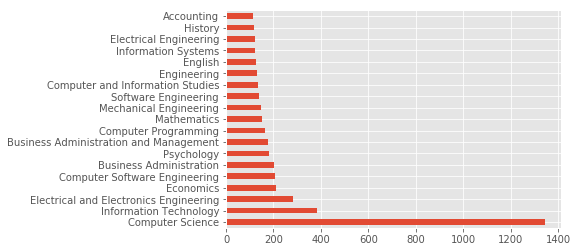

In [31]:
Major_freq = fcc['SchoolMajor'].value_counts()
major_job = Major_freq[Major_freq>100].index
Major_freq[Major_freq>100].plot.barh()
plt.show()

找出所有分類的名稱：

In [32]:
df_major = fcc[fcc['SchoolMajor'].isin(major_job)]
df_major['SchoolMajor'].unique()

array(['Information Technology', 'Electrical and Electronics Engineering',
       'Computer Science', 'English', 'Computer Software Engineering',
       'Mathematics', 'Business Administration', 'Psychology',
       'Accounting', 'Electrical Engineering', 'Economics',
       'Information Systems', 'Mechanical Engineering',
       'Computer and Information Studies', 'Engineering',
       'Computer Programming', 'Software Engineering',
       'Business Administration and Management', 'History'], dtype=object)

In [33]:
# def including_match(word):
#     return fcc['SchoolMajor'][fcc['SchoolMajor'].str.lower().str.contains(word,na=False)].unique()
# # fcc['SchoolMajor'].str.contains('Engineering').fillna(False)including_match('engineer|tech|imformation')
# industry = {}
# industry['tech'] = including_match('engineer|tech|imformation')
# industry['bussiness'] = including_match('business|manage|adminis')
# industry

In [34]:
# for e in industry:
#     print(len(industry[e]))

將這些學科手動進行四個分組：

In [35]:
all_class = {
    "Technology" : ['Computer Science', 'Information Technology','Electrical and Electronics Engineering', 'Computer Software Engineering', 'Computer Programming', 'Mechanical Engineering','Software Engineering', 'Computer and Information Studies','Engineering','Information Systems','Electrical Engineering'],
    "Commercial" : ['Economics','Business Administration','Business Administration and Management','Accounting'],
    "Science" : ['Psychology','Mathematics'],
    "Others" : ['History','English'],
}

建立新的DF並確認其中的分類只有這4種：

In [36]:
for e in all_class:
    df_major.loc[df_major['SchoolMajor'].isin(all_class[e]),'major_class'] = e
df_major['major_class'].unique()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array(['Technology', 'Others', 'Science', 'Commercial'], dtype=object)

分析4種分組的數量關係：發現科技相關領域遠高於其他領域

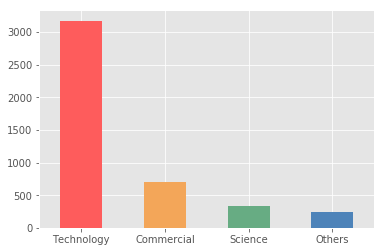

In [37]:
df_major['major_class'].value_counts().plot.bar(color=colors)
plt.xticks(rotation=0)
plt.show()

## 市場價格分析：

接著我們要利用上面所分析的各種特徵與價格相關的欄位進行交叉分析：

分析不同主科領域學習程式的費用，發現這四個族群在學習費用上並沒有太明顯的差異

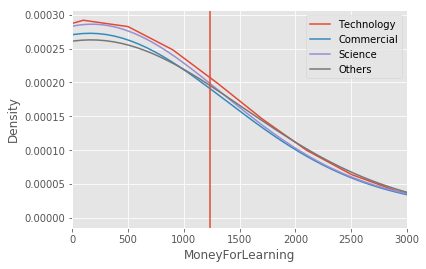

In [38]:
for e in ['Technology','Commercial','Science','Others']:
    df_major.loc[df_major['major_class']==e,'MoneyForLearning'].plot.kde(label=e)
plt.axvline(df_major.loc[df_major['major_class']==e,'MoneyForLearning'].mean())
plt.xlim(0,3000)
plt.xlabel('MoneyForLearning')
plt.legend()
plt.show()

分析四個族群的收入分布狀況，發現四個族群的主要收入集群有蠻大的差異，但在學習程式的花費上並沒有太大的差異，這表示我們可以懷疑收入與在學習程式上的花費相關性並沒有那麼高

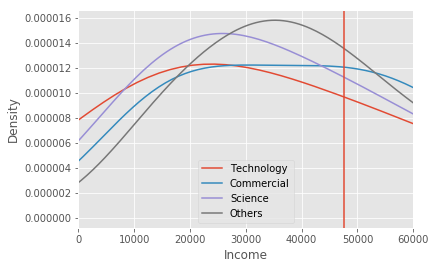

In [39]:
for e in ['Technology','Commercial','Science','Others']:
    df_major.loc[df_major['major_class']==e,'Income'].plot.kde(label=e)
plt.axvline(df_major.loc[df_major['major_class']==e,'Income'].mean())
plt.xlim(0,60000)
plt.xlabel('Income')
plt.legend()
plt.show()

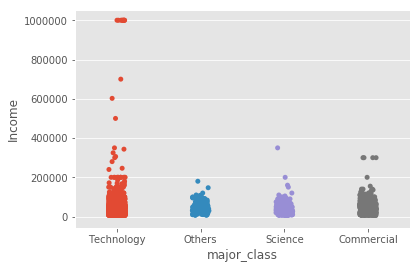

In [71]:
sns.stripplot(data=df_major,x='major_class',y='Income')
plt.show()

將收入與學習程式花費做線性迴歸分析，發現商管與非自然學科領域的學習花費與收入比例呈正相關，但這會牽涉到上面提到的假設，如果收入與學習花費相關性較低，那這邊的分析就有比較高的風險：

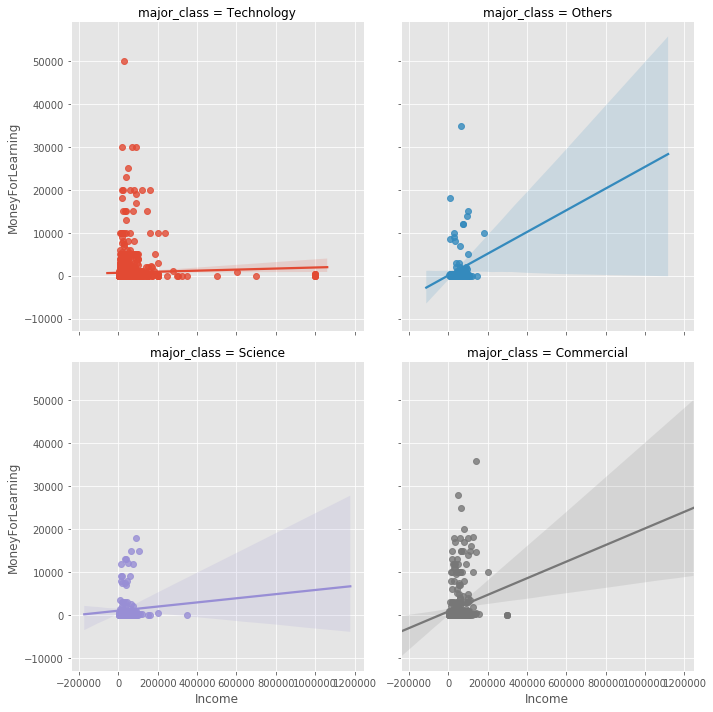

In [40]:
datas = df_major[['Income','MoneyForLearning','major_class']].dropna(axis=0)
sns.lmplot(data=datas,x='Income',y='MoneyForLearning',hue='major_class',col='major_class',col_wrap=2)
plt.show()

接著利用年齡屬性與學習花費做線性迴歸，發現兩個變量似乎沒有太大的相關性

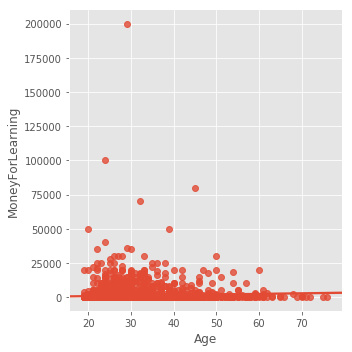

In [41]:
sns.lmplot(data=df_major[df_major['Age']>18],x='Age',y='MoneyForLearning')
plt.show()

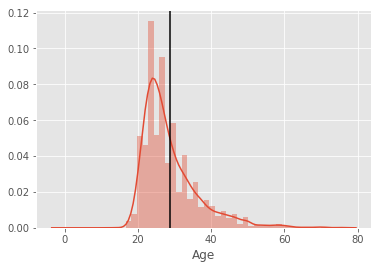

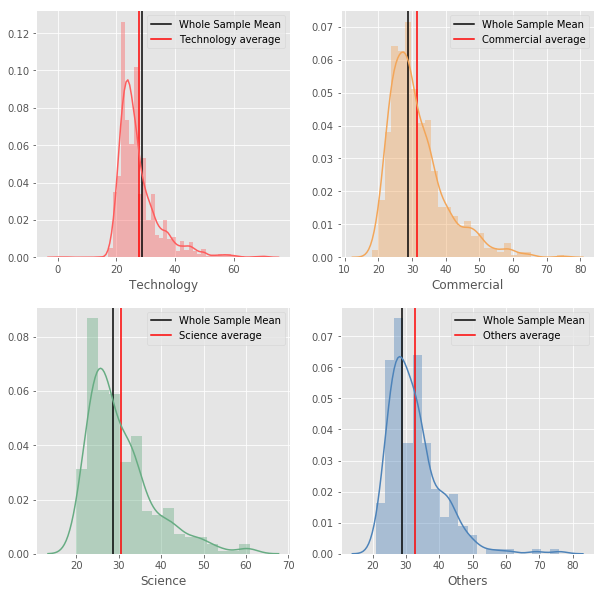

In [42]:
sns.distplot(df_major['Age'].dropna())
plt.axvline(df_major['Age'].dropna().mean(),color='black',label='Whole Sample Mean')
major_name = ['Technology','Commercial','Science','Others']
f = plt.figure(figsize=(10,10))
for e in range(4):
    mask = df_major.loc[df_major['major_class']==major_name[e],'Age'].dropna()
    ax = f.add_subplot(2,2,e+1)
    ax.axvline(df_major['Age'].dropna().mean(),color='black',label='Whole Sample Mean')
    ax.axvline(mask.mean(),color='red',label=f'{major_name[e]} average')
    ax.legend()
    ax = sns.distplot(mask,axlabel=major_name[e],color=colors[e])
plt.show()

這邊需要先將fcc_gender重新copy一次，因為我們剛才都在fcc做分析，但現在要結和性別但是fcc_gender並沒有剛才分析的InterestedOccupation欄位

In [43]:
fcc_gender = fcc.copy()
fcc_gender['Gender'] = fcc_gender['Gender'].apply(lambda x:x if x in ['male','female',np.nan] else 'transgender')
fcc_gender['Gender'].unique()

array(['female', 'male', nan, 'transgender'], dtype=object)

In [68]:
# fcc_gender['Gender'].value_counts(dropna=False).plot.pie(explode=[0,0,0.1,0.1],colors=colors,autopct='%1.1f%%')
# plt.show()

分析不同國家的使用者性別比例，但並沒有太大的比例差異

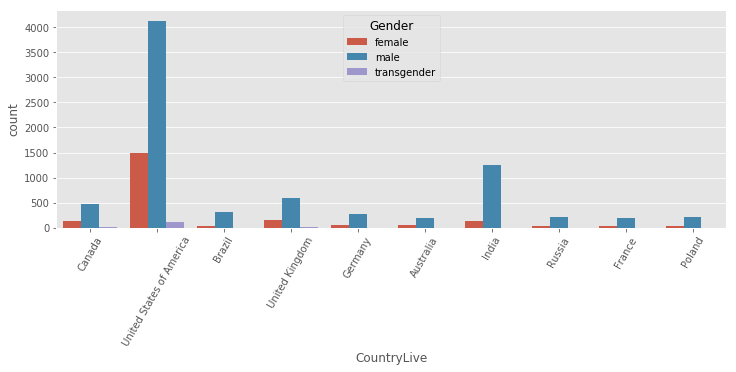

In [45]:
country10 = fcc['CountryLive'].value_counts().sort_values(ascending =False)[0:10]
country_rank = country10.index
plt.figure(figsize=(12,4))
sns.countplot(data=fcc_gender[fcc_gender['CountryLive'].isin(country_rank)],x='CountryLive',hue='Gender')
plt.xticks(rotation=60)
plt.show()

分析不同國家的職涯興趣占比，發現美國跟印度以及英國的對於網頁開發有興趣的使用者占比是較高的

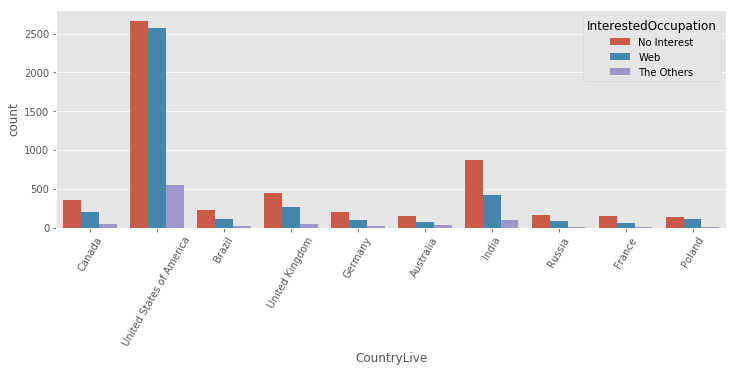

In [46]:
plt.figure(figsize=(12,4))
sns.countplot(data=fcc_gender[fcc_gender['CountryLive'].isin(country_rank)],x='CountryLive',hue='InterestedOccupation')
plt.xticks(rotation=60)
plt.show()

不同國家與「使用線上資源」與「參與線下活動」比較：<br>
*.印度市場使用Youtube學習Coding的比例高很多*<br>
*.印度市場是唯一現下活動參與高於非參與的國家*<br>

In [47]:
def columns_like(pattern):
    df = fcc.loc[:,fcc.columns.str.contains(pattern)].copy()
    return df

將不同國家與線上線下參加人數做交叉分析，發現印度地區的線上資源使用率非常高

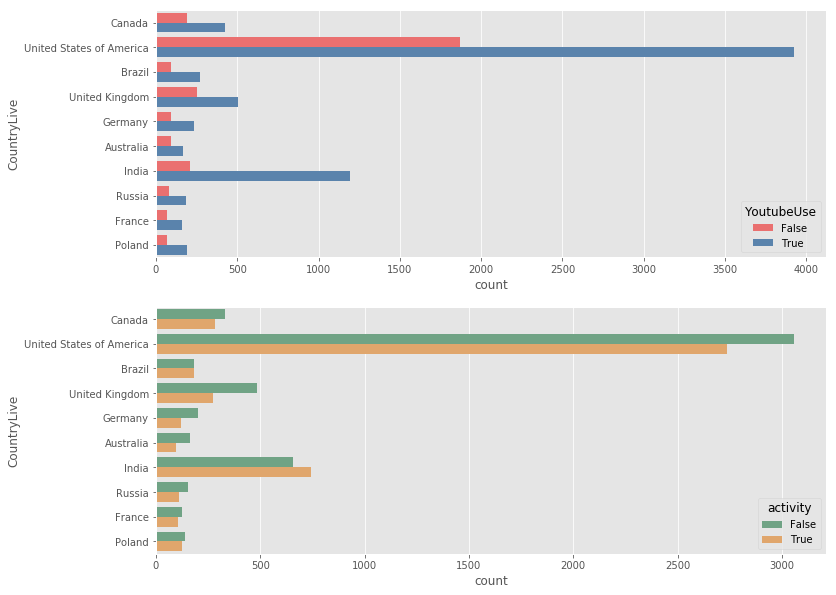

In [48]:
f,axes = plt.subplots(2,1,figsize=(12,10),sharex=False,sharey=False)
for e in range(2):
    ax_index = ['YoutubeUse','activity']
    data = fcc[fcc['CountryLive'].isin(country10.index)]
    sns.countplot(data=data,y='CountryLive',hue=ax_index[e],ax=axes[e],palette=[colors[0+e*2],colors[3-e*2]])
plt.show()

使用盒狀圖顯示不同語言的學習花費分佈

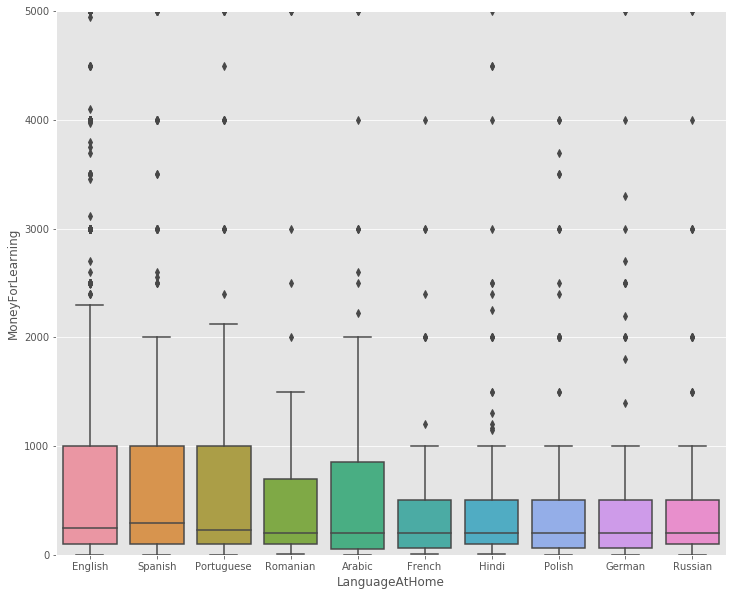

In [49]:
plt.figure(figsize=(12,10))
lan_over_200 = fcc['LanguageAtHome'].value_counts()[fcc['LanguageAtHome'].value_counts()>200].index
sns.boxplot(data=fcc[(fcc['LanguageAtHome'].isin(lan_over_200)) & (fcc['MoneyForLearning']>0)],x='LanguageAtHome',y='MoneyForLearning')
plt.ylim(0,5000)
plt.show()

將不同語言與線上線下參與人數做交叉分析

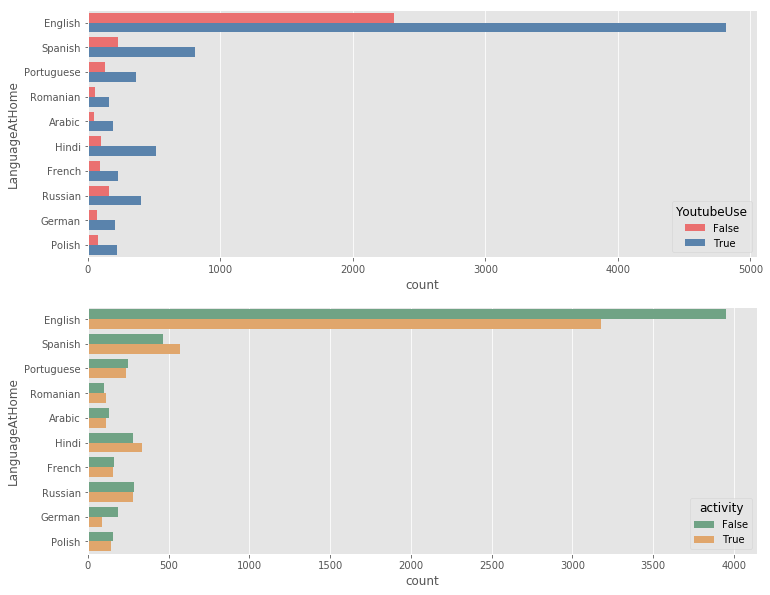

In [50]:
f,axes = plt.subplots(2,1,figsize=(12,10),sharex=False,sharey=False)
for e in range(2):
    ax_index = ['YoutubeUse','activity']
    data = fcc[fcc['LanguageAtHome'].isin(lan_over_200)]
    sns.countplot(data=data,y='LanguageAtHome',hue=ax_index[e],ax=axes[e],palette=[colors[0+e*2],colors[3-e*2]])
plt.show()

使用者認為有解決他問題的程式資源，主要以FCC,StakeOverflow,Codecademy,MDN四大資源為主

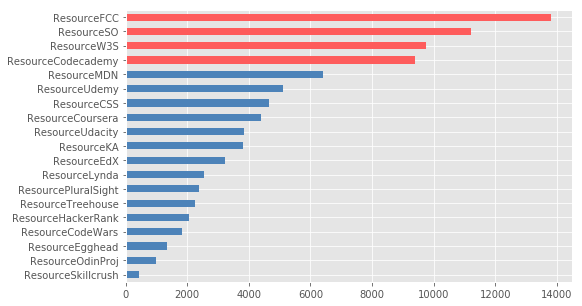

In [51]:
plt.figure(figsize=(8,5))
df_source = columns_like("source")
df_source.sum().sort_values().plot.barh(color=[colors[3]]*15+[colors[0]]*4)
plt.show()

針對codecademy與前十大國家以做比對看是否只是因為人數較高所以使得codecademy的使用者數量也較高

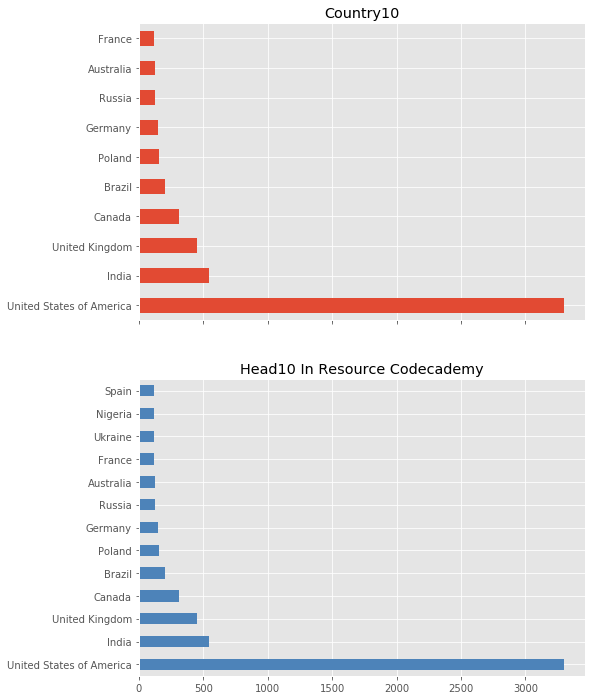

In [52]:
f,axes = plt.subplots(2,1,figsize=(8,12),sharex=True)
codecademy_freq = fcc[(fcc['ResourceCodecademy']==1)]['CountryLive'].value_counts()
fcc[(fcc['ResourceCodecademy']==1)&(fcc['CountryLive'].isin(country10.index))]['CountryLive'].value_counts().plot.barh(ax=axes[0],title="Country10")
codecademy_freq[codecademy_freq>100].plot.barh(ax=axes[1],color=colors[3],title="Head10 In Resource Codecademy")
plt.show()

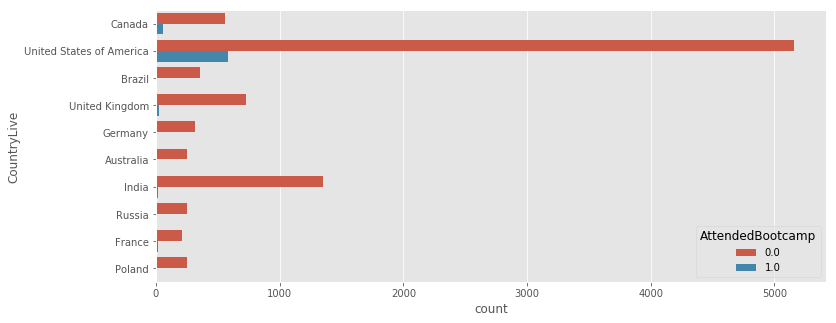

In [53]:
plt.figure(figsize=(12,5))
df_india = fcc[fcc['CountryLive']=='India'].copy()
sns.countplot(data=fcc[fcc['CountryLive'].isin(country10.index)],y='CountryLive',hue='AttendedBootcamp')
plt.show()

In [72]:
# fcc[fcc['InterestedOccupation']=='Web']['Income'].describe()

In [73]:
# sns.stripplot(data=df_major,x='major_class',y='Income')
# plt.show()

試著去除尚未開始花費的使用者，並分析有花費在學習程式的使用者分佈，發現並沒有明顯變化，代表大部分使用者的學習花費有一定的上限

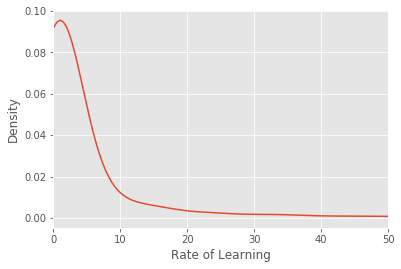

In [56]:
df_drop_free = df_major.copy()
df_drop_free = df_drop_free[df_drop_free['MoneyForLearning']!=0]
(df_drop_free['MoneyForLearning']/df_drop_free['Income']*100).dropna().plot.kde()

# sns.distplot((fcc['MoneyForLearning']/fcc['Income']*100).dropna(),bins=100)
plt.xlim(0,50)
plt.xlabel('Rate of Learning')
plt.show()

再利用盒狀圖顯示趨勢，可以看到大約50%的人只會花費100美金

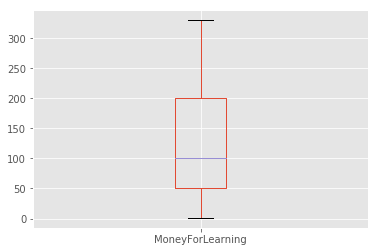

In [57]:
df_drop_free[df_drop_free['MoneyForLearning']<333]['MoneyForLearning'].plot.box()
plt.show()

將四大主科領域與線上線下活動與資源參加人數利用小提琴圖做分析，發現所有領域的花費趨勢有一個天花板，分別是最大學習花類比例約落在100美金，75%的使用者最多只花500美金，大致上符合上面的分析結果

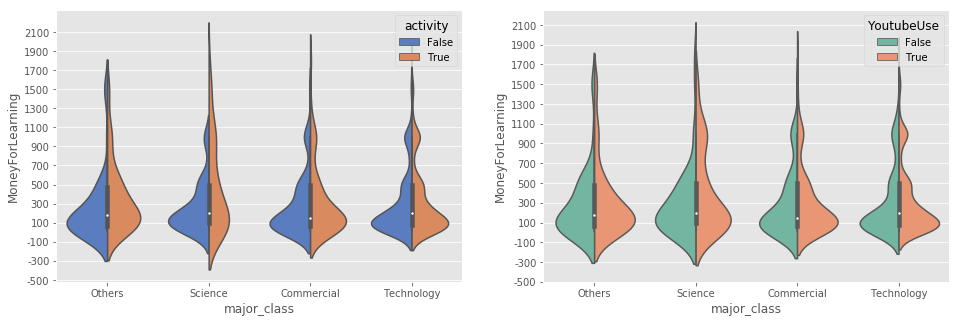

In [58]:
f = plt.figure(figsize=(16,5))
for e in range(2):
    palett = ["muted","Set2"]
    arr = ['activity','YoutubeUse']
    ax = f.add_subplot(1,2,e+1)
    sns.violinplot(data=df_drop_free[df_drop_free['MoneyForLearning']<2000],x='major_class',y='MoneyForLearning',hue=arr[e],split=True,palette=palett[e])
    plt.yticks(np.arange(-500,2300,200),np.arange(-500,2300,200))
plt.show()

接著我們想觀察學習時間與學習花費的相關性，發現網頁開發者的學習時間與花費相關性較高，但一樣會有相關程度的問題需要評估

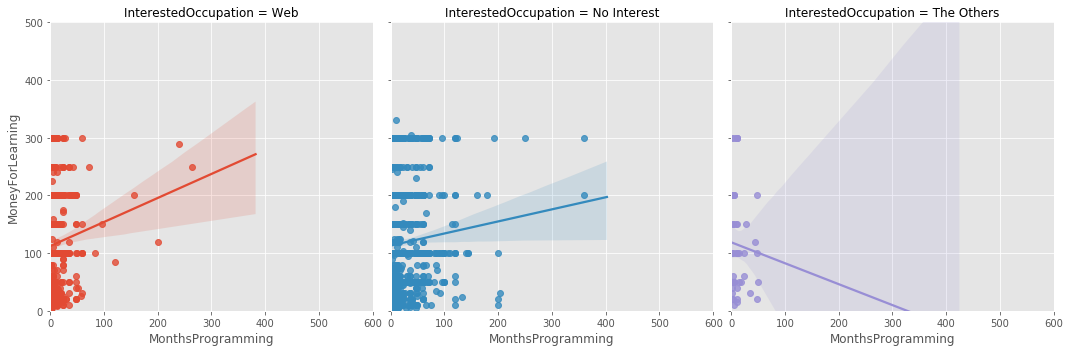

In [74]:
sns.lmplot(data=df_drop_free[df_drop_free['MoneyForLearning']<333],x='MonthsProgramming',y='MoneyForLearning',col='InterestedOccupation',hue='InterestedOccupation')
plt.ylim(0,500)
plt.xlim(0,600)
plt.show()

In [60]:
groups = df_drop_free.groupby('InterestedOccupation')
for e in ['Web','No Interest','The Others']:
    print(f"{e}'s correlation':{groups.get_group(e).corr()['Income']['MoneyForLearning']}")

Web's correlation':0.0032127805004002136
No Interest's correlation':0.08112711770309639
The Others's correlation':0.2800133178083195


In [61]:
fcc[(fcc['MonthsProgramming']<6) & (fcc['MoneyForLearning']<3333)]['MoneyForLearning'].describe()

count    5838.000000
mean      125.624015
std       367.666098
min         0.000000
25%         0.000000
50%         0.000000
75%        63.500000
max      3120.000000
Name: MoneyForLearning, dtype: float64

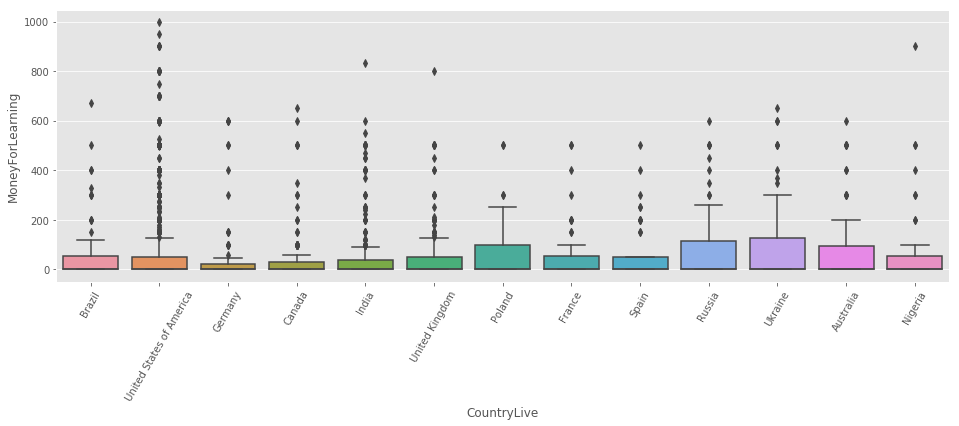

In [62]:
country_over_200 = fcc['CountryLive'].value_counts()[fcc['CountryLive'].value_counts()>200].index
plt.figure(figsize=(16,5))
sns.boxplot(data=fcc[(fcc['MonthsProgramming']<6) & (fcc['MoneyForLearning']<1000) & (fcc['CountryLive'].isin(country_over_200))],y='MoneyForLearning',x='CountryLive')
plt.xticks(rotation=60)
plt.show()

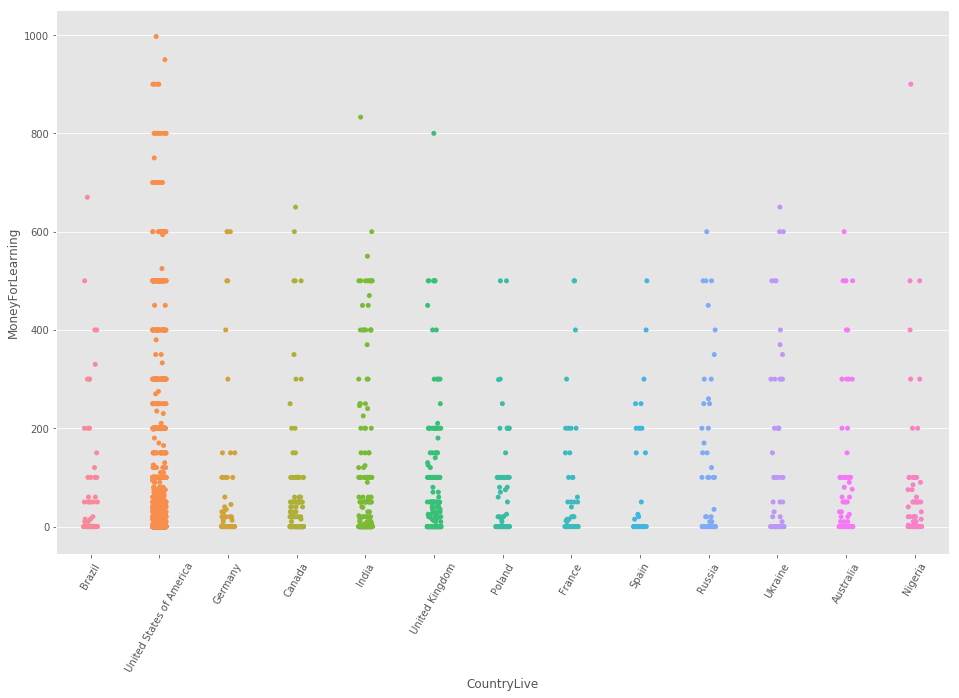

In [63]:
plt.figure(figsize=(16,10))
sns.stripplot(data=fcc[(fcc['MonthsProgramming']<6) & (fcc['MoneyForLearning']<1000) & (fcc['CountryLive'].isin(country_over_200))],y='MoneyForLearning',x='CountryLive')
plt.xticks(rotation=60)
plt.show()

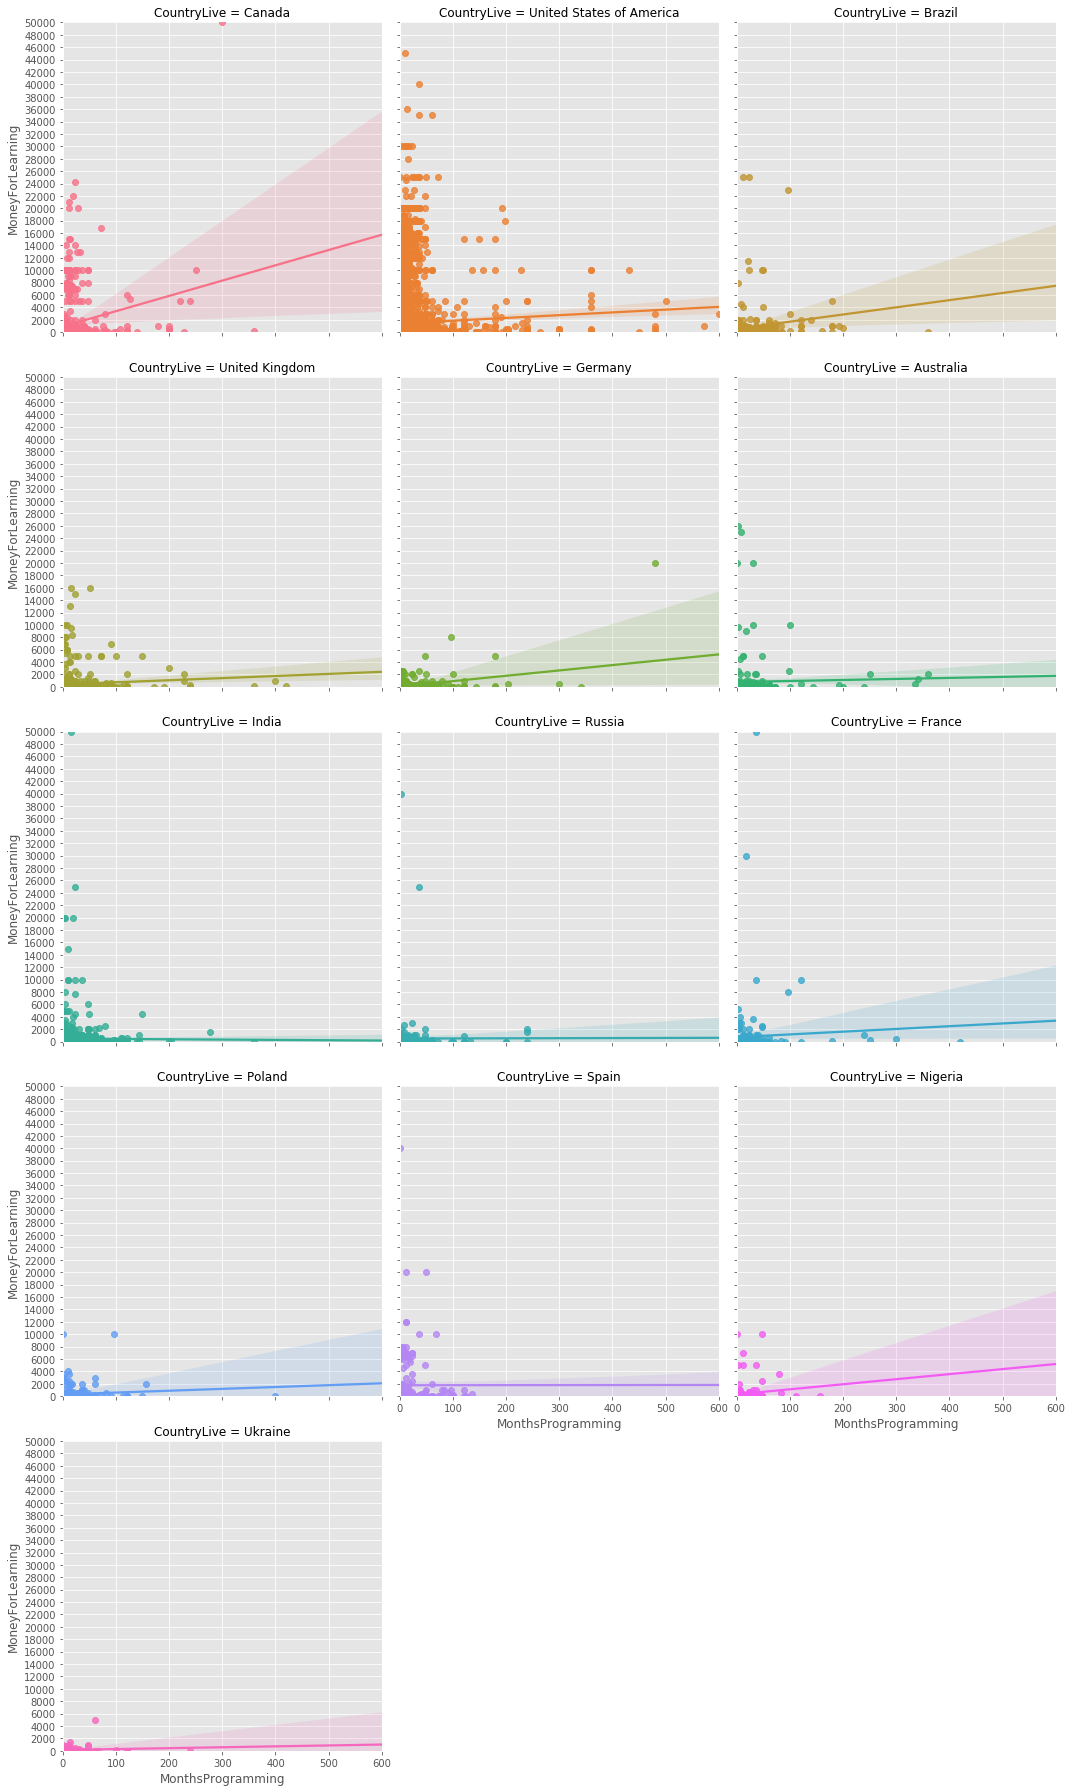

In [64]:
sns.lmplot(data=fcc[fcc['CountryLive'].isin(country_over_200)],x='MonthsProgramming',y='MoneyForLearning',col='CountryLive',hue='CountryLive',col_wrap=3)
plt.ylim(0,50000)
plt.yticks(np.arange(0,52000,2000),np.arange(0,51000,2000))
plt.xlim(0,600)
plt.show()

In [65]:
df_major.loc[:,'income_month_interval'] = pd.cut(df_major['Income']/12,bins=np.append(np.arange(0,35000,5000),df_major['Income'].max()/12))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


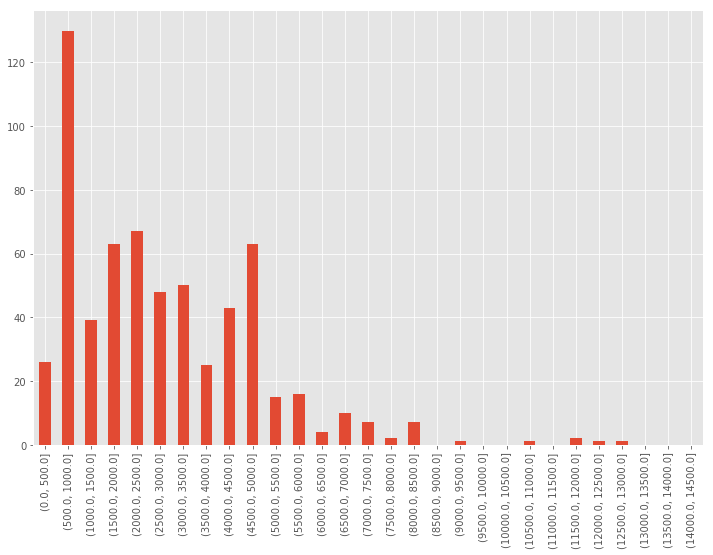

In [66]:
plt.figure(figsize=(12,8))
fcc['income_month_interval'] = pd.cut((fcc['Income']/12),np.append(np.arange(0,35000,500),df_major['Income'].max()/12))
icm_freq = fcc[fcc['CodeEventFCC']==1]['income_month_interval'].value_counts().sort_index()
icm_freq.iloc[0:(icm_freq>0).sum()].plot.bar()
plt.xticks()
plt.show()

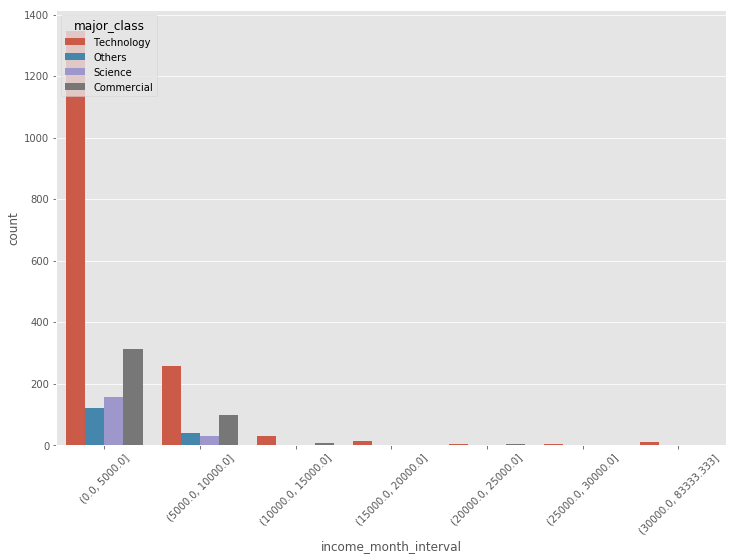

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_major,x='income_month_interval',hue='major_class')
plt.xticks(rotation=45)
plt.show()